In [2]:
import cv2
import joblib
import os
from matplotlib import pyplot as plt
from src.utils import *
import pickle # alternative to joblib 
import json
from sklearn.metrics import classification_report
import random

In [5]:
# Load the model
model_path = "src/checkpoint/rf_best_model_latest.pkl"
try:
    with open(model_path, "rb") as f:
        model = pickle.load(f)
except:
    model = joblib.load(model_path)

# Load the parameters
params_path = "src/checkpoint/rf_params_latest.json"
with open(params_path, "r") as f:
    params = json.load(f)

img_size = params["img_size"]
bin_size = params["bin"]


c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.6.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.6.0 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


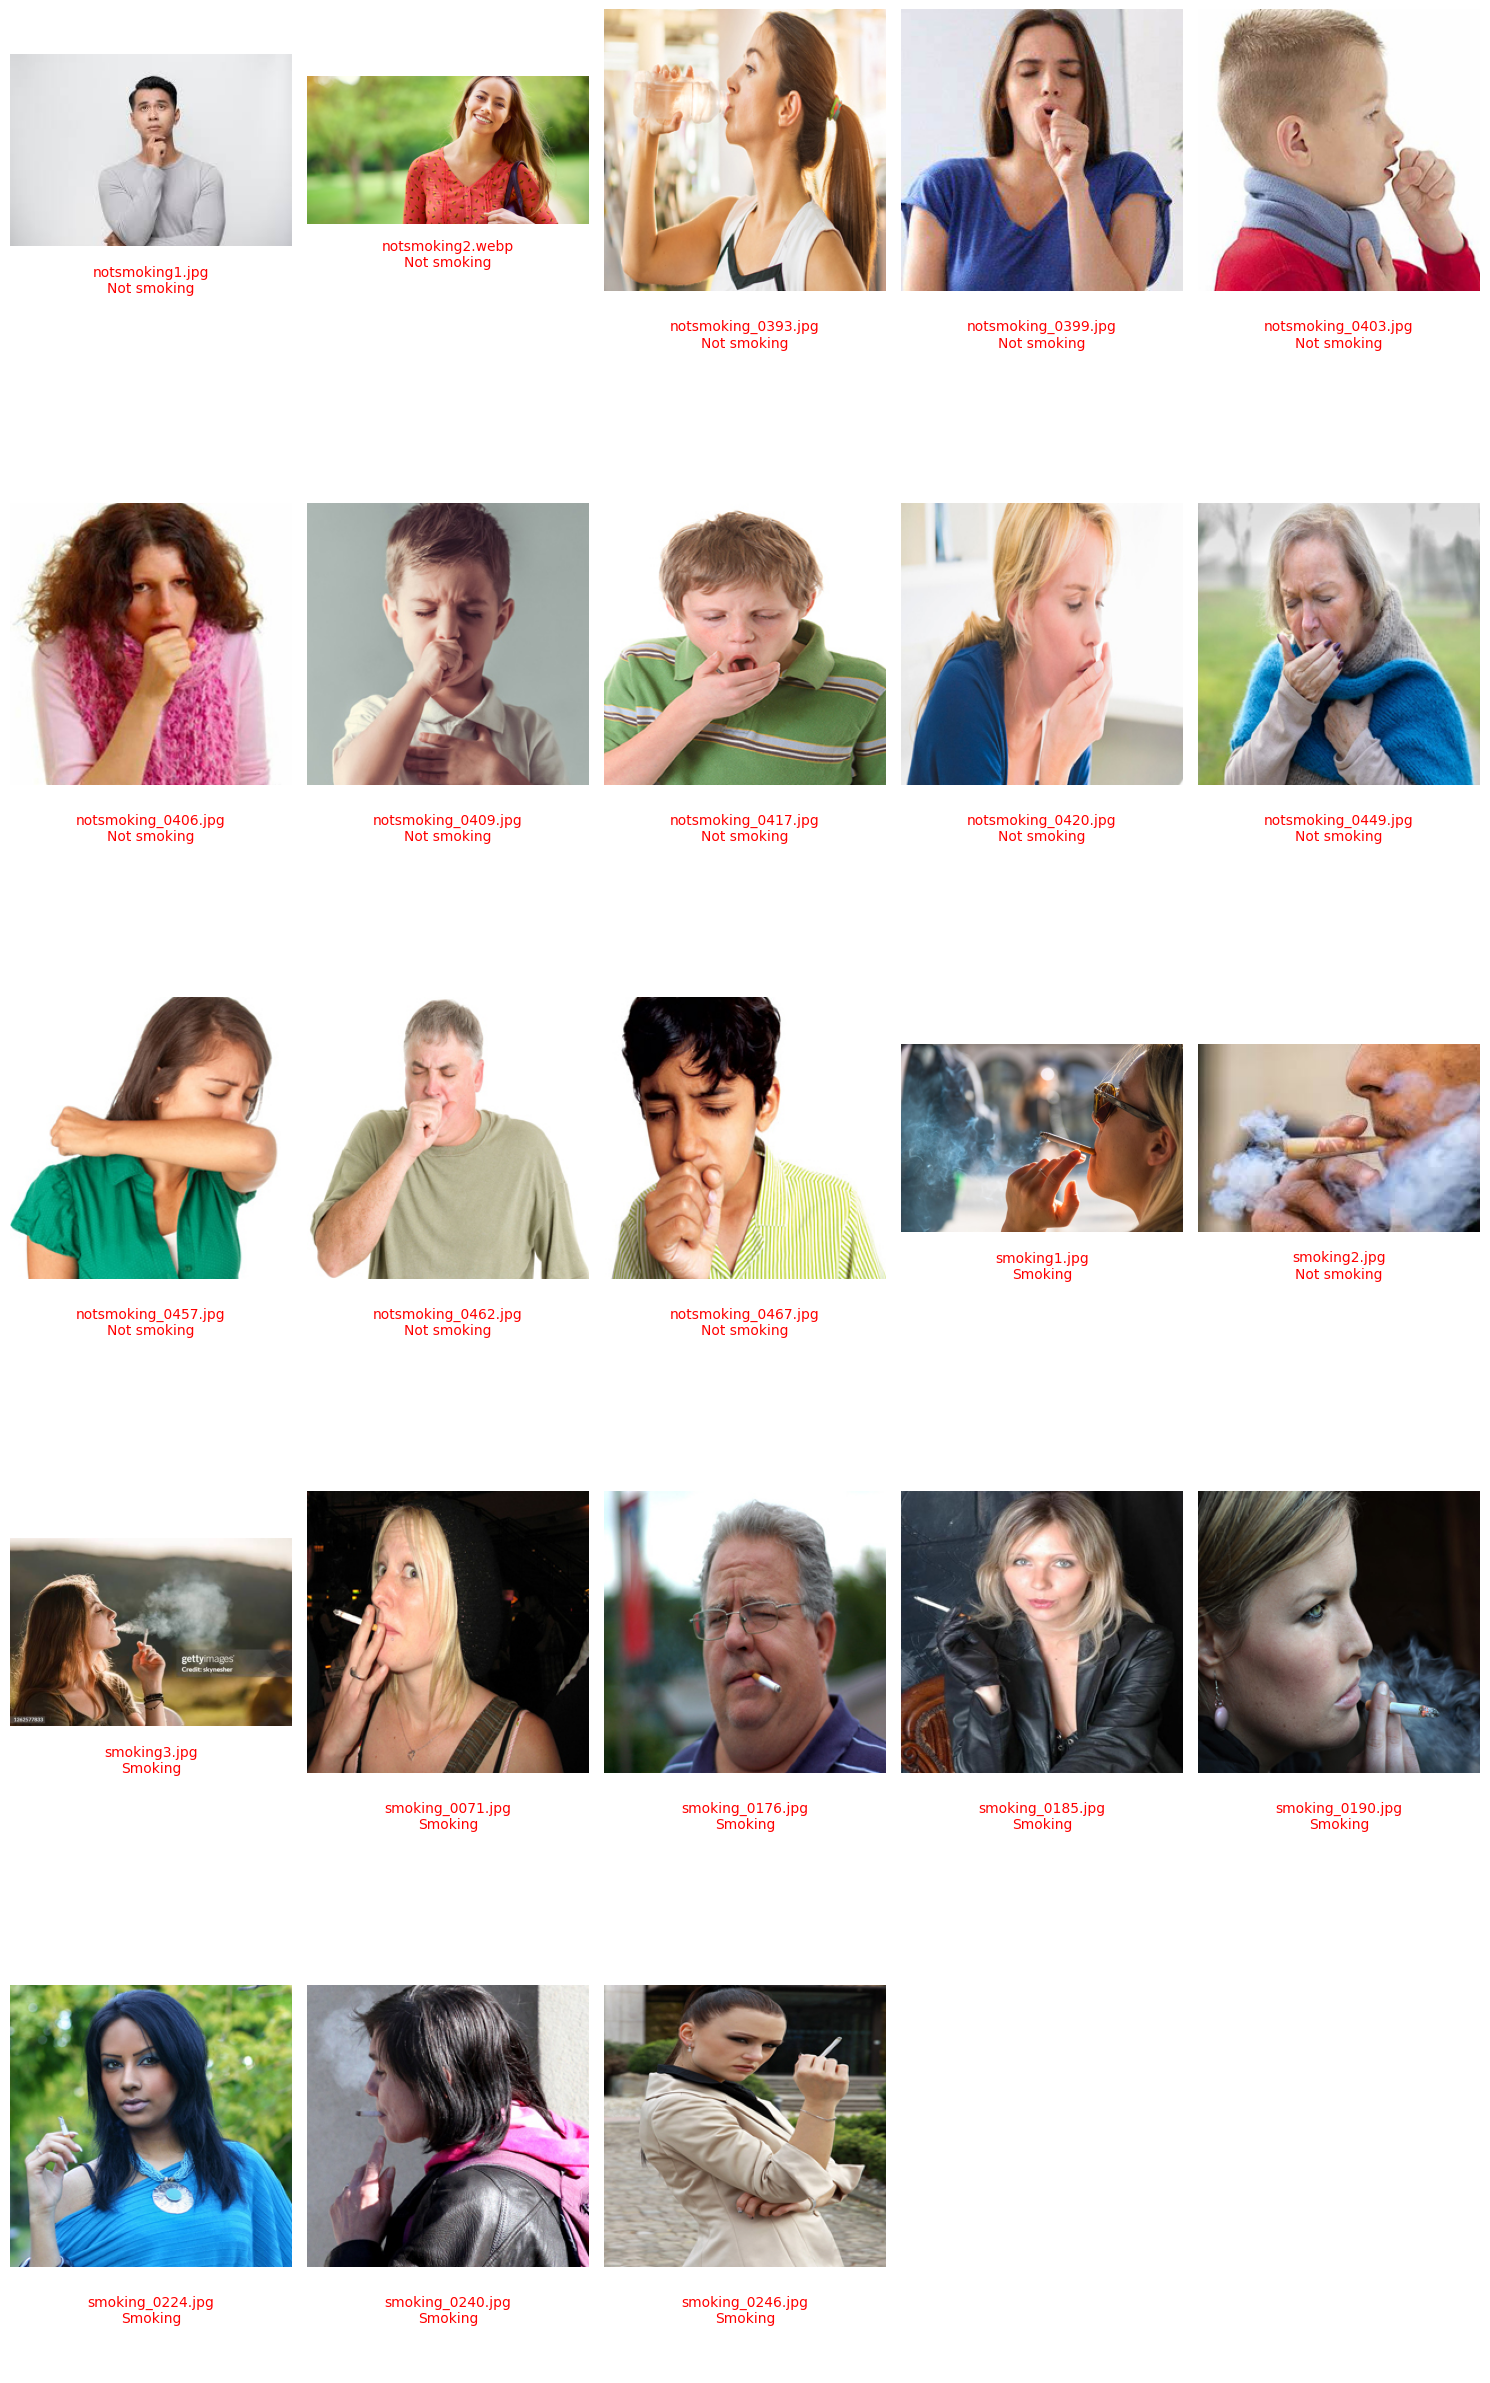

In [6]:
test_path = "data/demo_img"
image_files = os.listdir(test_path)

# Số lượng ảnh muốn hiển thị mỗi hàng
images_per_row = 5
# Số lượng hàng cần thiết
num_rows = (len(image_files) // images_per_row) + (1 if len(image_files) % images_per_row != 0 else 0)

# Tạo subplots với số hàng và cột phù hợp
fig, axes = plt.subplots(num_rows, images_per_row, figsize=(15, 5 * num_rows))

# Lặp qua từng ảnh và hiển thị
for i, image_name in enumerate(image_files):
    image_path = os.path.join(test_path, image_name)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Đổi màu từ BGR sang RGB

    img = preprocess_hsv(image, img_size=img_size, bin=bin_size)
    # Dự đoán nhãn cho ảnh
    pred = model.predict([img])[0]
    if pred == 0:
        label = "Not smoking"
    else:
        label = "Smoking"

    # Tính toán vị trí hàng và cột của ảnh trong grid
    row = i // images_per_row
    col = i % images_per_row

    # Hiển thị ảnh tại vị trí hàng, cột
    axes[row, col].imshow(image)
    axes[row, col].axis('off')  # Tắt hiển thị trục

    # Vẽ nhãn và tên ảnh dưới ảnh
    display_text = f"{image_name}\n{label}"  # Kết hợp tên ảnh và nhãn
    axes[row, col].text(0.5, -0.1, display_text, ha='center', va='top', fontsize=10, color='red', transform=axes[row, col].transAxes)

# Tắt các trục thừa nếu số ảnh không đủ fill hết các cột
for i in range(len(image_files), num_rows * images_per_row):
    row = i // images_per_row
    col = i % images_per_row
    axes[row, col].axis('off')

plt.tight_layout()  # Điều chỉnh khoảng cách giữa các ảnh
plt.show()